# Libraries and files

In [109]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

tpath = 9 #total experiments

#photometry path and file
FOLDER_PATH = 'E:/Bruchas_lab/Lab_photometry/Li_fear_box_triggered-220602-095047/'

FOLDER_NAME = [0 for i in range(tpath)]
FOLDER_NAME[0] = '159459-R-221006-091824'
FOLDER_NAME[1] = '159459-L-221020-102241'
FOLDER_NAME[2] = '159459-BL-221018-091752'
FOLDER_NAME[3] = '151653-R-221005-112408'
FOLDER_NAME[4] = '151653-L-221019-114353'
FOLDER_NAME[5] = '151653-RR-221012-102704'
FOLDER_NAME[6] = '151652-L-221011-091017'
FOLDER_NAME[7] = '151652-RR-221018-121215'
FOLDER_NAME[8] = '151653-LL-221101-100649'


print("FOLDER_NAME: ", FOLDER_NAME)
BLOCK_PATH = [0 for i in range(tpath)]
BLOCK_PATH[0] = FOLDER_PATH + FOLDER_NAME[0]
BLOCK_PATH[1] = FOLDER_PATH + FOLDER_NAME[1]
BLOCK_PATH[2] = FOLDER_PATH + FOLDER_NAME[2]
BLOCK_PATH[3] = FOLDER_PATH + FOLDER_NAME[3]
BLOCK_PATH[4] = FOLDER_PATH + FOLDER_NAME[4]
BLOCK_PATH[5] = FOLDER_PATH + FOLDER_NAME[5]
BLOCK_PATH[6] = FOLDER_PATH + FOLDER_NAME[6]
BLOCK_PATH[7] = FOLDER_PATH + FOLDER_NAME[7]
BLOCK_PATH[8] = FOLDER_PATH + FOLDER_NAME[8]


#Path to videos
VIDEO_PATH = [0 for i in range(tpath)]
VIDEO_PATH[0] = BLOCK_PATH[0]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1.avi'
VIDEO_PATH[1] = BLOCK_PATH[1]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi'
VIDEO_PATH[2] = BLOCK_PATH[2]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1.avi'
VIDEO_PATH[3] = BLOCK_PATH[3]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1.avi'
VIDEO_PATH[4] = BLOCK_PATH[4]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1.avi'
VIDEO_PATH[5] = BLOCK_PATH[5]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1.avi'
VIDEO_PATH[6] = BLOCK_PATH[6]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1.avi'
VIDEO_PATH[7] = BLOCK_PATH[7]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1.avi'
VIDEO_PATH[8] = BLOCK_PATH[8]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1.avi'

#Behavior Deeplabcut file
BEHAVE_PATH = 'E:/Bruchas_lab/Lab_DLC/'
BEHAVE_NAME = [0 for i in range(tpath)]
BEHAVE_NAME[0] = 'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[1] = 'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[2] = 'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[3] = 'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[4] = 'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[5] = 'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[6] = 'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[7] = 'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[8] = 'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'

print("\033[1m", tpath, " Experiments: "+"\033[0m")
for i in range(tpath):
    print(i+1,".", FOLDER_NAME[i])
print("Done")

FOLDER_NAME:  ['159459-R-221006-091824', '159459-L-221020-102241', '159459-BL-221018-091752', '151653-R-221005-112408', '151653-L-221019-114353', '151653-RR-221012-102704', '151652-L-221011-091017', '151652-RR-221018-121215', '151653-LL-221101-100649']
 9  Experiments: 
1 . 159459-R-221006-091824
2 . 159459-L-221020-102241
3 . 159459-BL-221018-091752
4 . 151653-R-221005-112408
5 . 151653-L-221019-114353
6 . 151653-RR-221012-102704
7 . 151652-L-221011-091017
8 . 151652-RR-221018-121215
9 . 151653-LL-221101-100649
Done


# Photometry analysis

 2 159459-L-221020-102241 : 
1. Importing photometry data...
read from t=0s to t=3182.84s
470/405 sampling frequency:  1017.2526245117188
Total sampling time:  3182.8475267430495
Done.
2. Normalizing photometry data...
Least squares fit: y =  1.2006666730904927 *x +  -37.02892903540114
Done.
3. Removing outlier...
Number of outliers changed to NaN:  224
Done.
4. Subtracting median...
Done.
6. Collecting video infomration
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Done.
7. Importing pose coordinates...
1 .  ['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Done.
8. Calculating pixel displacement...
ALL Done.


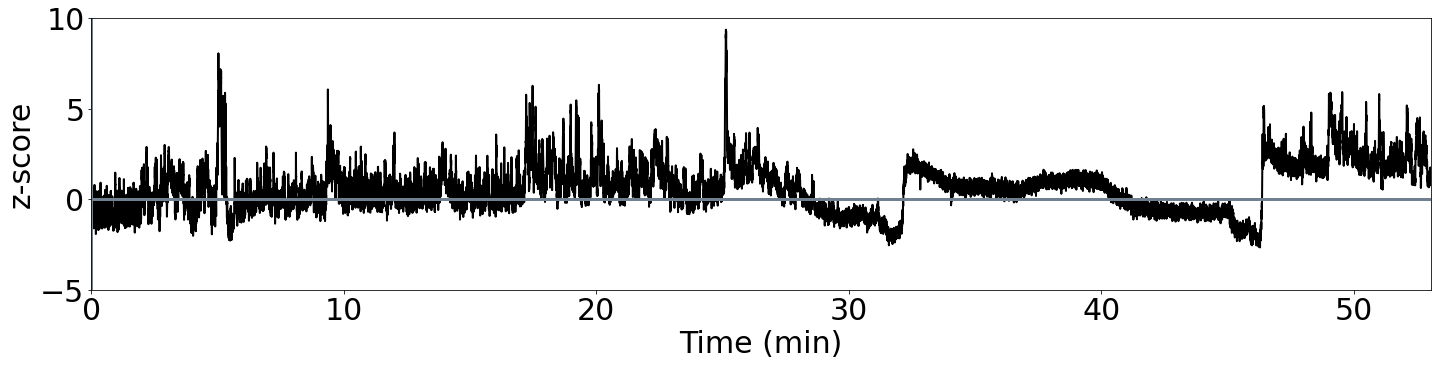

In [110]:
#Photometry data z-score normalization for analysis
k=1

#User defined parameters
#baseline start/end to define interval to use from which its median will be used for normalization
baseline_start = 0 # in seconds
baseline_end = 300 #in seconds
dF_F_outlier = 50
    
print("\033[1m", k+1, FOLDER_NAME[k], ": "+"\033[0m")    
print("\033[1m"+"Importing photometry data..."+"\033[0m")
data = read_block(BLOCK_PATH[k])

#Define sample size and frequency
data_470 = data.streams._470A.data
data_405 = data.streams._405A.data
size_470 = len(data_470)
size_405 = len(data_405) #isosbestic channel
freq_470 = data.streams._470A.fs #sampling frequency
print("470/405 sampling frequency: ", freq_470)
time_470 = np.linspace(1, size_470, size_470) / freq_470
total_time = time_470[size_470-1]
print("Total sampling time: ", total_time)
fit_window = size_470
print("Done.")

print("\033[1m"+"Normalizing photometry data..."+"\033[0m")
#Fit 405 nm trace to 470 nm by applying least-squares fit

#Linear least square fit
Sum_f = 0 #f is 405A
Sum_g = 0 #g is 470A
Sum_fg = 0 # fg is 405A*407A
Sum_fsq = 0 #fsq is f^2 or 405A^2
for i in range(fit_window):
    Sum_f = Sum_f + data_405[i]
    Sum_g = Sum_g + data_470[i]
    Sum_fg = Sum_fg + data_405[i]*data_470[i]
    Sum_fsq = Sum_fsq + (data_405[i])*(data_405[i])
#end for i

#Slope*x + Intercept = y
Slope = (Sum_f*Sum_g - size_470*Sum_fg)/(Sum_f*Sum_f - size_470*Sum_fsq)
Intercept = (Sum_g*Sum_fsq - Sum_f*Sum_fg)/(size_470*Sum_fsq - Sum_f*Sum_f)
print("Least squares fit: y = ", Slope, "*x + ", Intercept)

#initialize fit
Fit_405 = [0 for i in range(size_470)]
dF_F = [0 for i in range(size_470)]
for i in range(size_470):
    Fit_405[i] = Slope*data_405[i] + Intercept
    dF_F[i] = (data_470[i] - Fit_405[i])*100/Fit_405[i]
#end for i
print("Done.")

#Outlier removal
print("\033[1m"+"Removing outlier..."+"\033[0m")
count = 0
for i in range(size_470):
    if abs(dF_F[i])>dF_F_outlier:
        dF_F[i] = np.NaN
        count = count + 1
    #endif
#end for i
print("   Number of outliers changed to NaN: ", count)
print("Done.")

#Z-scoring
print("\033[1m"+"Performing z-scoring..."+"\033[0m")
avg_F = np.nanmean(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
std_F = np.nanstd(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
for i in range(size_470):
     dF_F[i] = (dF_F[i] - avg_F)/std_F
#end for i
print("Done.")   
    
#Behavior video import
print("\033[1m"+"Collecting video information"+"\033[0m")
#Video information
cap = cv2.VideoCapture(VIDEO_PATH[k])
fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frate = cap.get(cv2.CAP_PROP_FPS)
tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
cap.release()
cv2.destroyAllWindows()
print("Done.")

#Collect pose coordinates from Deeplabcut csv file
print("\033[1m"+"Importing pose coordinates..."+"\033[0m")
#initialize lists
behave_time=[]
nose_xcoord=[]
nose_ycoord=[]
leftEar_xcoord=[]
leftEar_ycoord=[]
rightEar_xcoord=[]
rightEar_ycoord=[]
tailBase_xcoord=[]
tailBase_ycoord=[]
with open(BEHAVE_PATH+BEHAVE_NAME[k]) as behave_file:
    reader = csv.reader(behave_file)
    i=0       
    for row in reader:
        if i==1:
            print(i,". ",row) #print coordinates headers
        if i>2:
            behave_time.append(np.round(int(row[0])/frate,2))
            nose_xcoord.append(np.round(float(row[1]),1))
            nose_ycoord.append(np.round(float(row[2]),1))
            leftEar_xcoord.append(np.round(float(row[4]),1))
            leftEar_ycoord.append(np.round(float(row[5]),1))
            rightEar_xcoord.append(np.round(float(row[7]),1))
            rightEar_ycoord.append(np.round(float(row[8]),1))
            tailBase_xcoord.append(np.round(float(row[10]),1))
            tailBase_ycoord.append(np.round(float(row[11]),1))
        #endif
        i=i+1
    #endfor
behave_file.close()
print("Done.")

#Calculate frame-by-frame coordinate displacement 
print("\033[1m"+"Calculating pixel displacement..."+"\033[0m")
#initialize variables
nose_dist = [0]
leftEar_dist = [0]
rightEar_dist = [0]
tailBase_dist = [0]
for i in range(len(behave_time)):
    if i>0:
        nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
        leftEar_dist.append(np.round(math.sqrt((leftEar_xcoord[i]-leftEar_xcoord[i-1])**2 + (leftEar_ycoord[i]-leftEar_ycoord[i-1])**2),2))
        rightEar_dist.append(np.round(math.sqrt((rightEar_xcoord[i]-rightEar_xcoord[i-1])**2 + (rightEar_ycoord[i]-rightEar_ycoord[i-1])**2),2))
        tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
    #endif
#end for i
print("Done.")

font_size = 30
plot_width = 24
plot_height = 5

time_470_min = [x/60 for x in time_470]

fig,(ax5) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax5.plot(time_470_min,dF_F, color='black', linewidth=2)
ax5.axvline(0, color='slategray', linewidth=3)
ax5.axhline(0, color='slategray', linewidth=3)
ax5.set_ylabel('z-score', fontsize=font_size)
ax5.set_xlabel('Time (min)', fontsize=font_size)
ax5.tick_params(axis="x", labelsize=font_size)
ax5.tick_params(axis="y", labelsize=font_size)
ax5.set_ylim(-5,10)
ax5.set_xlim(0, total_time/60)
plt.xticks(np.arange(0, total_time/60, 10))
plt.show()

# Behavioral analysis

In [111]:
#Behavioral analysis from arrest to movement (A2M)
pause_interval = 1 #in second
pause_threshold = 10 #pixel
marker_dist = [nose_dist, tailBase_dist]
femerge = [0 for i in range(tpath)]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR end

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []

activity_mean_array = []
activity_mean2_array = []    
event_times = []
event2_times = []

#Transition from arrest to movement
print("\033[1m"+"Behavioral event detection: arrest to movement"+"\033[0m")
#User defined parameters
intervals=['pre','drug','ISO','emerge','post'] #This data set was divided into these different 5 conditions: before drug, +drug, +ISO, ISO emergence, recovery 
print("total behave time: ", behave_time[-1])
total_time = behave_time[-1]
interval_cutoff = [0,300] #Examining specifically the 5 min baseline
pre_window_size = 5 # in second
post_window_size = 10 # in second

#Initialize matrices and lists
#behavior marker # defined by marker_dist, manual addition if need more
category_size=len(intervals)
behave_data_marker1 = []
behave_data_marker2 = []
behave_data2_marker1 = []
behave_data2_marker2 = []
activity_data = []
activity_data2 = []
event_count = 0
event_count2 = 0
behave_interval_time = []
activity_interval_time = []
behave_mean=[]
behave_std=[]
print("Done")

#Re-align time to the analysis window
print("\033[1m"+"Re-aligning event times..."+"\033[0m")
#define time intervals in behavioral and photometry data
behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)])
activity_interval=int((pre_window_size+post_window_size)*freq_470)
activity_interval_time.append(time_470[0:activity_interval])

#re-align time interval to defined window
behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]]
activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]]
print("Done.")

count = 0
movement_bin = []
print("\033[1m"+"Finding behavioral events..."+"\033[0m")
initiate=0
for i in range(int(total_time*frate)+1):
    if(i>pre_window_size*frate and i<int((int(total_time)-post_window_size)*frate) and int(i+post_window_size*frate)<len(marker_dist[0])):
        if(i>interval_cutoff[0]*frate and i<interval_cutoff[1]*frate):
            #if not moving
            if(marker_dist[0][i]<pause_threshold):
                #no prior moving
                if(initiate==0):
                    count = count+1
                    movement_bin.append(0)
                #if prior moving
                else:
                    #if moving duration met, count as move to arrest
                    if(np.amax(marker_dist[0][i:int(i+frate*pause_interval)])<pause_threshold):
                        event2_times.append(behave_time[i])
                        behave_data2_marker1.append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data2_marker2.append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data2.append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470):(int((i/frate-pre_window_size)*freq_470)+activity_interval)],2))
                        initiate=0
                        count=0
                        movement_bin.append(0)
                    #if moving duration not met, continue as moving
                    else:
                        count=count+1
                        movement_bin.append(10)
            #if moving            
            else:
                #if prior not moving
                if(initiate==0):
                    #if not moving duration met, count as arrest to move
                    if(count>=(frate*pause_interval)):
                        event_times.append(behave_time[i])
                        behave_data_marker1.append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data_marker2.append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data.append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470):(int((i/frate-pre_window_size)*freq_470)+activity_interval)],2))
                        initiate=1
                        count=0
                        movement_bin.append(10)
                    #if moving duration not met, back to 0
                    else:
                        count=0
                        movement_bin.append(0)
                #if prior moving, continue to count as moving
                else:
                    movement_bin.append(10)
            #endif
        else:
            movement_bin.append(0)
        #endif
    else:
        movement_bin.append(0)
    #endif
#endfor i
print("Done.")


#Photometry activity normalized to baseline median
print("\033[1m"+"Normalize to pre-event median..."+"\033[0m")
if(len(activity_data)!=0):
    event_count=len(activity_data)
    for i in range(len(activity_data)):
        baseline_median = np.median(activity_data[i][0:int(pre_window_size*freq_470)-1])
        activity_data[i] = [i-baseline_median for i in activity_data[i]]
    #end for i
#endif
print("Arrest to movement event counts: ", event_count)
if(len(activity_data2)!=0):
    event_count2=len(activity_data2)
    for i in range(len(activity_data2)):
        baseline_median = np.median(activity_data2[i][0:int(pre_window_size*freq_470)-1])
        activity_data2[i] = [i-baseline_median for i in activity_data2[i]]
    #end for i
#endif
print("Movement to arrest event counts: ", event_count2)
print("Done.")
    
#Transpose data
print("\033[1m"+"Re-format data..."+"\033[0m")
behave_mean_marker1=[]
behave_mean_marker2=[]
behave_std_marker1=[]
behave_std_marker2=[]
behave_data_transposed_marker1 = np.transpose(np.array(behave_data_marker1))
behave_data_transposed_marker2 = np.transpose(np.array(behave_data_marker2))
for i in range(len(behave_data_transposed_marker1)):    
    behave_mean_marker1.append(np.nanmean(behave_data_transposed_marker1[i]))
    behave_mean_marker2.append(np.nanmean(behave_data_transposed_marker2[i]))
    behave_std_marker1.append(np.nanstd(behave_data_transposed_marker1[i]))
    behave_std_marker2.append(np.nanstd(behave_data_transposed_marker2[i]))            
#end for i
behave_mean_marker1_array = behave_mean_marker1
behave_mean_marker2_array = behave_mean_marker2
behave_std_marker1_array = behave_std_marker1
behave_std_marker2_array = behave_std_marker2
print("A2M Behave mean 1: ", len(behave_mean_marker1)) #Arrest to movement (A2M)
print("A2M Behave mean 2: ", len(behave_mean_marker2))
   
activity_mean=[]
activity_std=[]
activity_data_transposed = np.transpose(np.array(activity_data))
for i in range(len(activity_data_transposed)):    
    activity_mean.append(np.nanmean(activity_data_transposed[i]))
    activity_std.append(np.nanstd(activity_data_transposed[i]))            
#end for i
activity_mean_array = activity_mean
activity_std_array = activity_std
print("A2M Activity mean: ", len(activity_mean)) #Arrest to movement (A2M)

behave_mean2_marker1=[]
behave_mean2_marker2=[]
behave_std2_marker1=[]
behave_std2_marker2=[]
behave_data2_transposed_marker1 = np.transpose(np.array(behave_data2_marker1))
behave_data2_transposed_marker2 = np.transpose(np.array(behave_data2_marker2))
for i in range(len(behave_data2_transposed_marker1)):    
    #print(i+1, "/", len(behave_data_transposed_marker1))
    behave_mean2_marker1.append(np.nanmean(behave_data2_transposed_marker1[i]))
    behave_mean2_marker2.append(np.nanmean(behave_data2_transposed_marker2[i]))
    behave_std2_marker1.append(np.nanstd(behave_data2_transposed_marker1[i]))
    behave_std2_marker2.append(np.nanstd(behave_data2_transposed_marker2[i]))
    #print("behave marker1 size: ", len(behave_mean_marker1))
#end for i                
behave_mean2_marker1_array = behave_mean2_marker1
behave_mean2_marker2_array = behave_mean2_marker2
behave_std2_marker1_array = behave_std2_marker1
behave_std2_marker2_array = behave_std2_marker2
print("M2A Behave mean 1: ", len(behave_mean2_marker1)) #Movement to arrest (M2A)
print("M2A Behave mean 2: ", len(behave_mean2_marker2))

activity_mean2=[]
activity_std2=[]
activity_data2_transposed = np.transpose(activity_data2)
for i in range(len(activity_data2_transposed)):    
    activity_mean2.append(np.nanmean(activity_data2_transposed[i]))
    activity_std2.append(np.nanstd(activity_data2_transposed[i]))            
#end for i
activity_mean2_array = activity_mean2
activity_std2_array = activity_std2
print("M2A Activity mean: ", len(activity_mean2))  #Movement to arrest (M2A)
print("Done.")


9. Behavioral event detection: arrest to movement
total behave time:  2751.9
Done
10. Re-aligning event times...
Done.
12. Finding behavioral events...
Done.
13. Normalize pre-event window to 0...
Arrest to movement event counts:  41
Movement to arrest event counts:  41
Done.
14. Re-format data...
A2M Behave mean 1:  150
A2M Behave mean 2:  150
A2M Activity mean:  15258
M2A Behave mean 1:  150
M2A Behave mean 2:  150
M2A Activity mean:  15258
ALL Done.


21. Plot behavior (arrest to movement)...


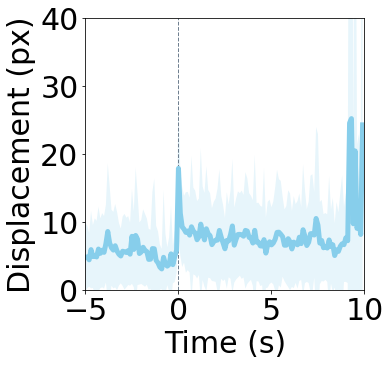

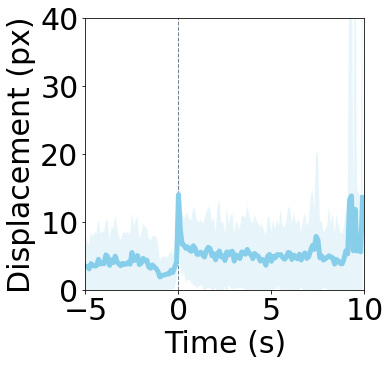

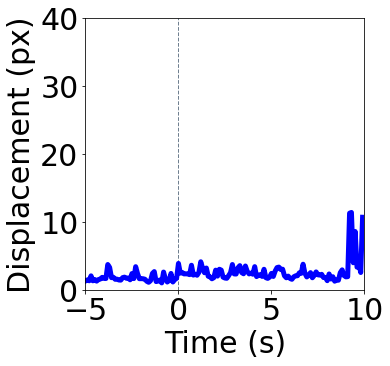

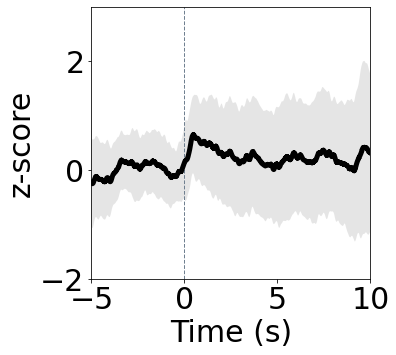

22. Plot behavior (movement to arrest)...


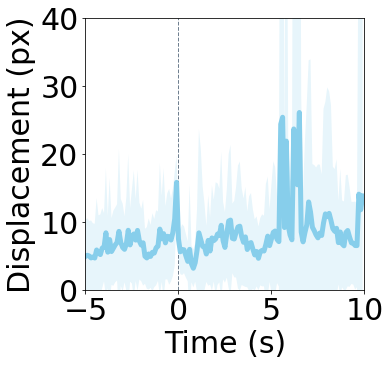

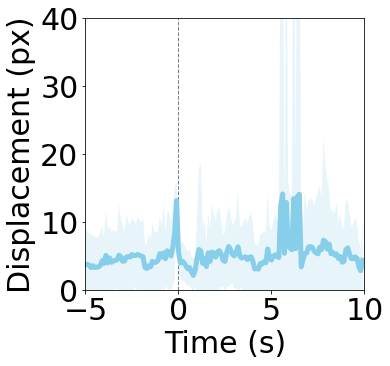

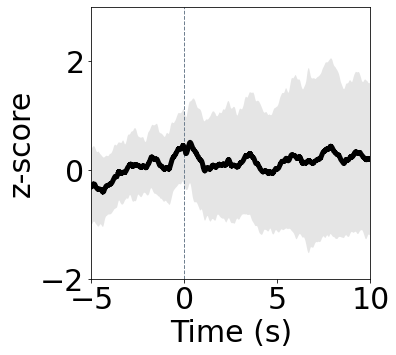

Done 2


In [112]:
# Plots of behavioral and photometry activity during detected events

import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 40
ymin_5 = -2
ymax_5 = 3
j=0

#Arrest to Movement
print("\033[1m"+"Plot behavior (arrest to movement)..."+"\033[0m")
temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean_array=(list(map(add,behave_mean_marker1_array,behave_mean_marker2_array))) #add two markers together
behave_std_array = []
for i in range(len(behave_std_marker1_array)):
    behave_std_array.append((behave_std_marker1_array[i]**2+behave_std_marker2_array[i]**2)**0.5)
ax4.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_array,behave_std_array)), list(map(operator.sub,behave_mean_array,behave_std_array)), facecolor='skyblue', alpha=0.2)
ax4.plot(behave_interval_time[0],behave_mean_array, color='skyblue', linewidth=5)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.show()

temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax4.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_marker1_array,behave_std_marker1_array)), list(map(operator.sub,behave_mean_marker1_array,behave_std_marker1_array)), facecolor='skyblue', alpha=0.2)
ax4.plot(behave_interval_time[0],behave_mean_marker1_array, color='skyblue', linewidth=5)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.savefig("20230302_LC_behavior_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax4.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax4.plot(behave_interval_time[0],behave_mean_marker2_array, color='blue', linewidth=5)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.show()


fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax6.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax6.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean_array,activity_std_array)), list(map(operator.sub,activity_mean_array,activity_std_array)), facecolor='gray', alpha=0.2)
ax6.plot(activity_interval_time[0],activity_mean_array, color='black', linewidth=5)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.savefig("20230302_LC_activity_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Movement to Arrest
print("\033[1m"+"Plot behavior (movement to arrest)..."+"\033[0m")
#for j in range(len(behave_data)):
temp_array=[[] for i in range(tpath)]
temp_transposed_array=[]
fig,ax7 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean2_array=(list(map(add,behave_mean2_marker1_array,behave_mean2_marker2_array))) #add two markers together
behave_std2_array = []
for i in range(len(behave_std2_marker1_array)):
    behave_std2_array.append((behave_std2_marker1_array[i]**2+behave_std2_marker2_array[i]**2)**0.5)
ax7.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax7.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean2_array,behave_std2_array)), list(map(operator.sub,behave_mean2_array,behave_std2_array)), facecolor='skyblue', alpha=0.2)
ax7.plot(behave_interval_time[0],behave_mean2_array, color='skyblue', linewidth=5)
ax7.set_ylabel('Displacement (px)', fontsize=font_size)
ax7.set_xlabel('Time (s)', fontsize=font_size)
ax7.tick_params(axis="x", labelsize=font_size)
ax7.tick_params(axis="y", labelsize=font_size)
ax7.set_ylim(0,ymax_4)
ax7.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.show()

temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax4.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean2_marker1_array,behave_std2_marker1_array)), list(map(operator.sub,behave_mean2_marker1_array,behave_std2_marker1_array)), facecolor='skyblue', alpha=0.2)
ax4.plot(behave_interval_time[0],behave_mean2_marker1_array, color='skyblue', linewidth=5)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.savefig("20230302_LC_behavior_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px.pdf",bbox_inches = 'tight',dpi=300)
plt.show()


fig,ax9 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax9.axvline(0, color='slategray', linewidth=1, linestyle='dashed')
ax9.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean2_array,activity_std2_array)), list(map(operator.sub,activity_mean2_array,activity_std2_array)), facecolor='gray', alpha=0.2)
ax9.plot(activity_interval_time[0],activity_mean2_array, color='black', linewidth=5)
ax9.set_ylabel('z-score', fontsize=font_size)
ax9.set_xlabel('Time (s)', fontsize=font_size)
ax9.tick_params(axis="x", labelsize=font_size)
ax9.tick_params(axis="y", labelsize=font_size)
ax9.set_ylim(ymin_5,ymax_5)
ax9.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.savefig("20230302_LC_activity_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

print("Done")

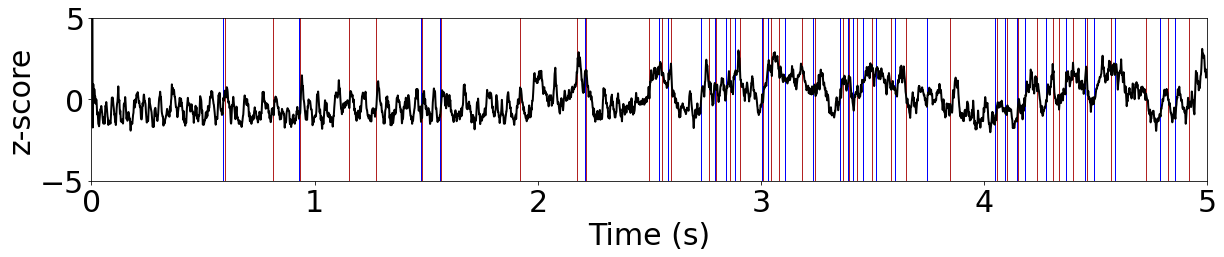

In [114]:
#Plot movement initiation and arrest events on photometry trace
#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=5
xint=1
ymin_2=-5
ymax_2=5
yint_2=5

event_times_min = [x/60 for x in event_times]
event2_times_min = [x/60 for x in event2_times]
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event_times_min)):
    ax2.axvline(event_times_min[i], color='blue', linewidth=1)
#endfor i
for i in range(len(event2_times_min)):
    ax2.axvline(event2_times_min[i], color='firebrick', linewidth=1)
#endfor i
time_470_min = [x/60 for x in time_470]
ax2.plot(time_470_min[::10], dF_F[::10], color='black', linewidth=2)
ax2.set_ylabel('z-score', fontsize=font_size)
ax2.set_xlabel('Time (s)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230118_LC_activity_events_zoomed_in.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

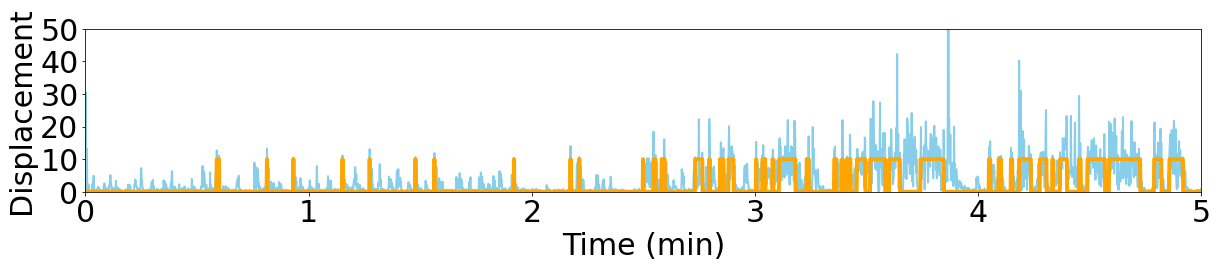

In [115]:
#Plot detected movement events on movement trace (pixel-displacement)

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=5
xint=1
ymin_2=0
ymax_2=50
yint_2=10

behave_time_min = [x/60 for x in behave_time]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
#for i in range(len(event_times)):
#    ax2.axvline(event_times[i], color='blue', linewidth=1)
#endfor i
#for i in range(len(event2_times)):
#    ax2.axvline(event2_times[i], color='firebrick', linewidth=1)
#endfor i
#ax2.plot(behave_time_min, marker_dist[1], color='blue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
ax2.plot(behave_time_min, movement_bin, color='orange',linewidth=4)
#ax2.axvline(pre_window_size, color='black', linewidth=2)
#ax2.axvline(behave_time[-1]-post_window_size, color='black', linewidth=2)
#ax2.axhline(pause_threshold, color='firebrick', linewidth=1)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.savefig("20230227_LC_behavior_events_zoomed_in.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

In [103]:
#Save data as numpy arrays
np.save("20220118_event_init.npy",event_times)
np.save("20220118_event_arrest.npy", event2_times)
np.save("20220118_behave_time.npy", behave_time)
np.save("20220118_dist_markers.npy", marker_dist)
np.save("20220118_movement_bin.npy", movement_bin)
print("saved")

saved


21. Plot behavior (arrest to movement)...
1 . [ 353 , 360 ]


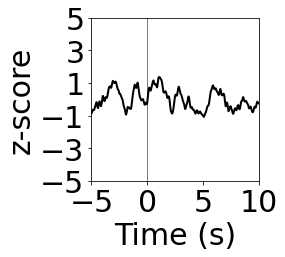

2 . [ 488 , 489 ]


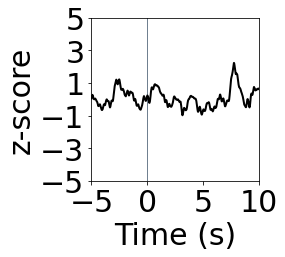

3 . [ 559 , 560 ]


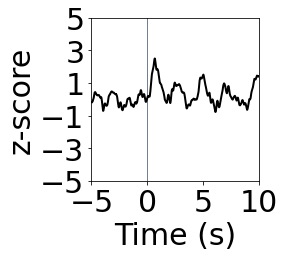

4 . [ 691 , 692 ]


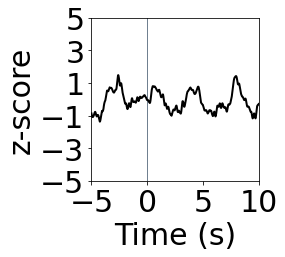

5 . [ 764 , 765 ]


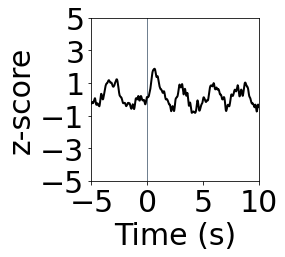

6 . [ 887 , 888 ]


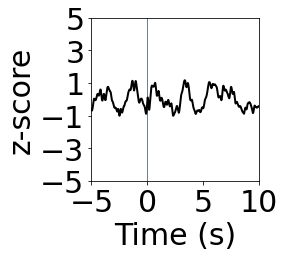

7 . [ 938 , 939 ]


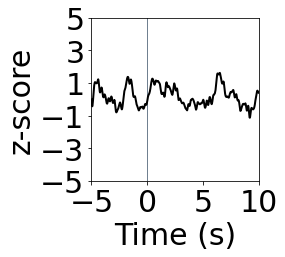

8 . [ 1152 , 1153 ]


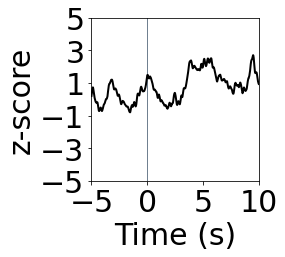

9 . [ 1304 , 1305 ]


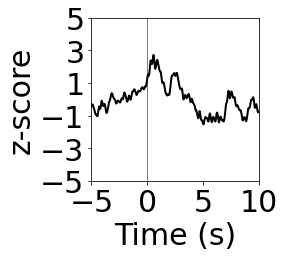

10 . [ 1327 , 1329 ]


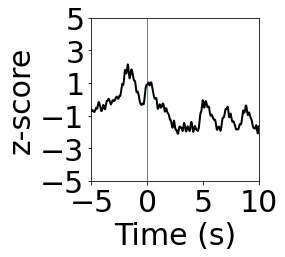

11 . [ 1499 , 1500 ]


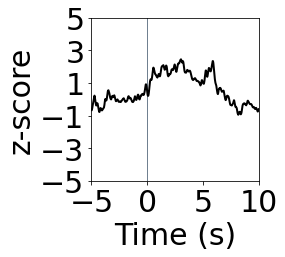

12 . [ 1527 , 1533 ]


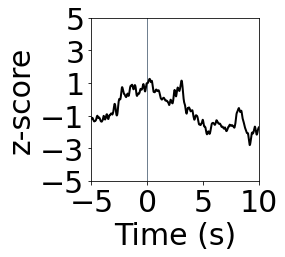

13 . [ 1549 , 1558 ]


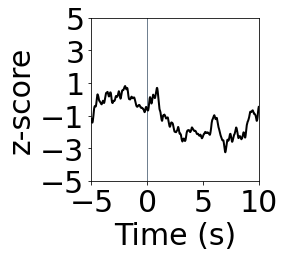

14 . [ 1639 , 1659 ]


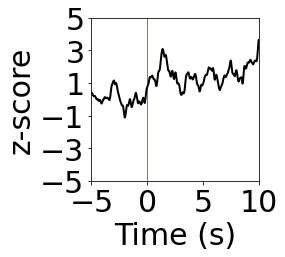

22. Plot behavior (movement to arrest)...
1 . [ 353 , 360 ]


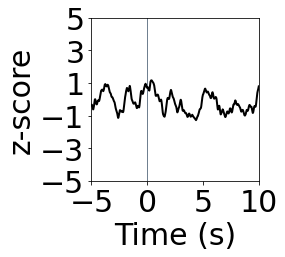

2 . [ 488 , 489 ]


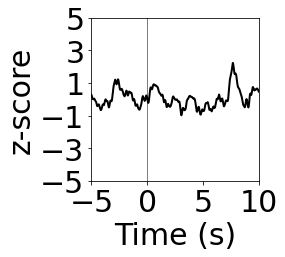

3 . [ 559 , 560 ]


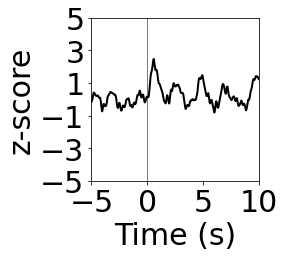

4 . [ 691 , 692 ]


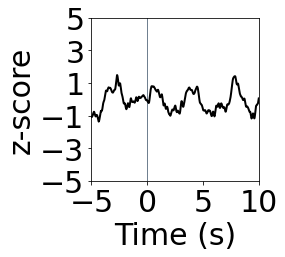

5 . [ 764 , 765 ]


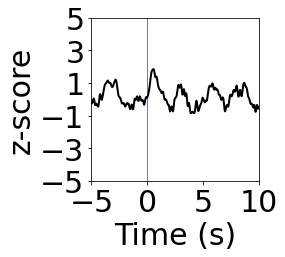

6 . [ 887 , 888 ]


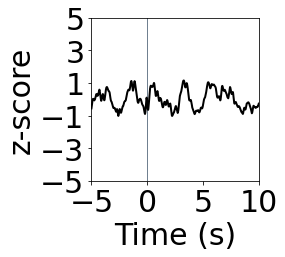

7 . [ 938 , 939 ]


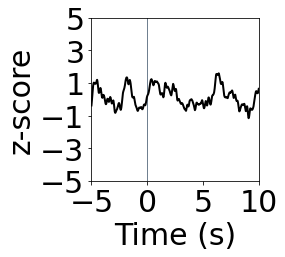

8 . [ 1152 , 1153 ]


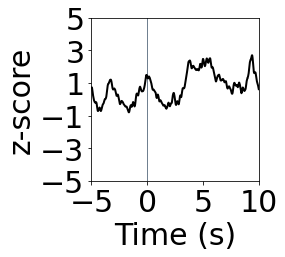

9 . [ 1304 , 1305 ]


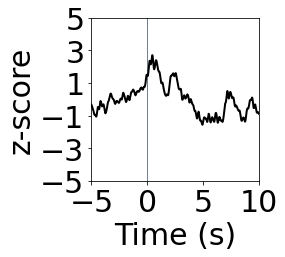

10 . [ 1327 , 1329 ]


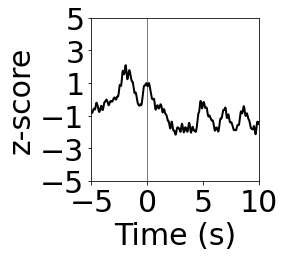

11 . [ 1499 , 1500 ]


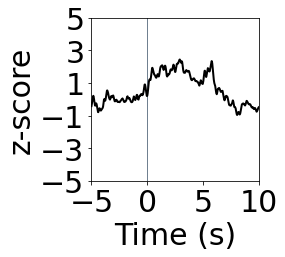

12 . [ 1527 , 1533 ]


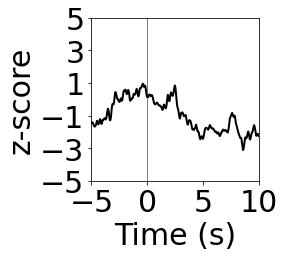

13 . [ 1549 , 1558 ]


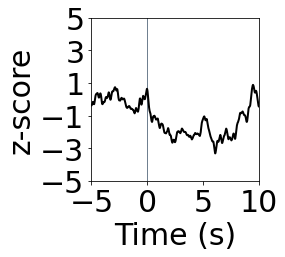

14 . [ 1639 , 1659 ]


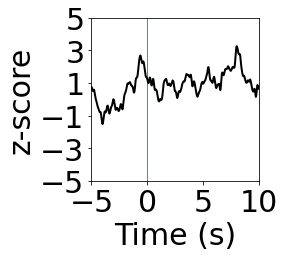

Done 2


In [118]:
# Visualizing individual events, photometry plots in relation to movement transitions

import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
font_size = 30
plot_width = 3
plot_height = 3
xint = 5
ymax_4 = 40
ymin_5 = -5
ymax_5 = 5
j=0

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"Plot behavior (arrest to movement)..."+"\033[0m")

for i in range(14):
    print(i+1,". [",int(event_times[i]*frate),",",int(event2_times[i]*frate),"]")
    fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
    ax6.axvline(0, color='slategray', linewidth=1)
    ax6.plot(activity_interval_time[0][::10],activity_data[i][::10], color='black', linewidth=2)
    ax6.set_ylabel('z-score', fontsize=font_size)
    ax6.set_xlabel('Time (s)', fontsize=font_size)
    ax6.tick_params(axis="x", labelsize=font_size)
    ax6.tick_params(axis="y", labelsize=font_size)
    ax6.set_ylim(ymin_5,ymax_5)
    ax6.set_xlim(-1*pre_window_size,post_window_size)
    plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
    plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
    plt.show()
#endfor i

print("\033[1m"+"Plot behavior (movement to arrest)..."+"\033[0m")

for i in range(14):
    print(i+1,". [",int(event_times[i]*frate),",",int(event2_times[i]*frate),"]")
    fig,ax9 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
    ax9.axvline(0, color='slategray', linewidth=1)
    ax9.plot(activity_interval_time[0][::10],activity_data2[i][::10], color='black', linewidth=2)
    ax9.set_ylabel('z-score', fontsize=font_size)
    ax9.set_xlabel('Time (s)', fontsize=font_size)
    ax9.tick_params(axis="x", labelsize=font_size)
    ax9.tick_params(axis="y", labelsize=font_size)
    ax9.set_ylim(ymin_5,ymax_5)
    ax9.set_xlim(-1*pre_window_size,post_window_size)
    plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
    plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
    plt.show()
#endfor i
print("Done")


In [121]:
#Readjusting movement event detection threshold to increase sensitivity

pause_interval = 0.2 #in second
pause_threshold = 3 #pixel
#marker_dist = [tailBase_dist, tailBase_dist]
#marker_dist = [nose_dist, nose_dist]
marker_dist = [nose_dist, tailBase_dist]
femerge = [0 for i in range(tpath)]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR end

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []

activity_mean_array = []
activity_mean2_array = []    
event_times = []
event2_times = []

#Transition from arrest to movement
print("\033[1m"+"Behavioral event detection: arrest to movement"+"\033[0m")
#User defined parameters
intervals=['pre','drug','ISO','emerge','post']
print("total behave time: ", behave_time[-1])
total_time = behave_time[-1]
#interval_cutoff = [0,300,1500,2700,femerge[k]/10,int(behave_time[-1])]
interval_cutoff = [0,300]
pre_window_size = 5 # in second
post_window_size = 10 # in second

#Initialize matrices and lists
#behavior marker # defined by marker_dist, manual addition if need more
category_size=len(intervals)
behave_data_marker1 = []
behave_data_marker2 = []
behave_data2_marker1 = []
behave_data2_marker2 = []
activity_data = []
activity_data2 = []
event_count = 0
event_count2 = 0
behave_interval_time = []
activity_interval_time = []
behave_mean=[]
behave_std=[]
print("Done")

#re-align time
print("\033[1m"+"Re-aligning event times..."+"\033[0m")
#define time intervals in behavioral and photometry data
behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)])
activity_interval=int((pre_window_size+post_window_size)*freq_470)
activity_interval_time.append(time_470[0:activity_interval])

#re-align time interval to defined window
behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]]
activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]]
print("Done.")

count = 0
movement_bin = []
print("\033[1m"+"Finding behavioral events..."+"\033[0m")
initiate=0
for i in range(int(total_time*frate)+1):
    if(i>pre_window_size*frate and i<int((int(total_time)-post_window_size)*frate) and int(i+post_window_size*frate)<len(marker_dist[0])):
        if(i>interval_cutoff[0]*frate and i<interval_cutoff[1]*frate):
            #if not moving
            if(marker_dist[0][i]<pause_threshold):
                #no prior moving
                if(initiate==0):
                    count = count+1
                    movement_bin.append(0)
                #if prior moving
                else:
                    #if moving duration met, count as move to arrest
                    if(np.amax(marker_dist[0][i:int(i+frate*pause_interval)])<pause_threshold):
                        event2_times.append(behave_time[i])
                        behave_data2_marker1.append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data2_marker2.append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data2.append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470):(int((i/frate-pre_window_size)*freq_470)+activity_interval)],2))
                        initiate=0
                        count=0
                        movement_bin.append(0)
                    #if moving duration not met, continue as moving
                    else:
                        count=count+1
                        movement_bin.append(pause_threshold)
            #if moving            
            else:
                #if prior not moving
                if(initiate==0):
                    #if not moving duration met, count as arrest to move
                    if(count>=(frate*pause_interval)):
                        event_times.append(behave_time[i])
                        behave_data_marker1.append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data_marker2.append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data.append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470):(int((i/frate-pre_window_size)*freq_470)+activity_interval)],2))
                        initiate=1
                        count=0
                        movement_bin.append(pause_threshold)
                    #if moving duration not met, back to 0
                    else:
                        count=0
                        movement_bin.append(0)
                #if prior moving, continue to count as moving
                else:
                    movement_bin.append(pause_threshold)
            #endif
        else:
            movement_bin.append(0)
        #endif
    else:
        movement_bin.append(0)
    #endif
#endfor i
print("Done.")


#Normalize activity to baseline median
print("\033[1m"+"Normalize to pre-event window baseline..."+"\033[0m")
if(len(activity_data)!=0):
    event_count=len(activity_data)
    for i in range(len(activity_data)):
        baseline_median = np.median(activity_data[i][0:int(pre_window_size*freq_470)-1])
        activity_data[i] = [i-baseline_median for i in activity_data[i]]
    #end for i
#endif
print("Arrest to movement event counts: ", event_count)
if(len(activity_data2)!=0):
    event_count2=len(activity_data2)
    for i in range(len(activity_data2)):
        baseline_median = np.median(activity_data2[i][0:int(pre_window_size*freq_470)-1])
        activity_data2[i] = [i-baseline_median for i in activity_data2[i]]
    #end for i
#endif
print("Movement to arrest event counts: ", event_count2)
print("Done.")
    
#Transpose data
print("\033[1m"+"Re-format data..."+"\033[0m")
behave_mean_marker1=[]
behave_mean_marker2=[]
behave_std_marker1=[]
behave_std_marker2=[]
behave_data_transposed_marker1 = np.transpose(np.array(behave_data_marker1))
behave_data_transposed_marker2 = np.transpose(np.array(behave_data_marker2))
for i in range(len(behave_data_transposed_marker1)):    
    behave_mean_marker1.append(np.nanmean(behave_data_transposed_marker1[i]))
    behave_mean_marker2.append(np.nanmean(behave_data_transposed_marker2[i]))
    behave_std_marker1.append(np.nanstd(behave_data_transposed_marker1[i]))
    behave_std_marker2.append(np.nanstd(behave_data_transposed_marker2[i]))            
#end for i
behave_mean_marker1_array = behave_mean_marker1
behave_mean_marker2_array = behave_mean_marker2
behave_std_marker1_array = behave_std_marker1
behave_std_marker2_array = behave_std_marker2
print("A2M Behave mean 1: ", len(behave_mean_marker1))
print("A2M Behave mean 2: ", len(behave_mean_marker2))
   
activity_mean=[]
activity_std=[]
activity_data_transposed = np.transpose(np.array(activity_data))
for i in range(len(activity_data_transposed)):    
    activity_mean.append(np.nanmean(activity_data_transposed[i]))
    activity_std.append(np.nanstd(activity_data_transposed[i]))            
#end for i
activity_mean_array = activity_mean
activity_std_array = activity_std
print("A2M Activity mean: ", len(activity_mean))

behave_mean2_marker1=[]
behave_mean2_marker2=[]
behave_std2_marker1=[]
behave_std2_marker2=[]
behave_data2_transposed_marker1 = np.transpose(np.array(behave_data2_marker1))
behave_data2_transposed_marker2 = np.transpose(np.array(behave_data2_marker2))
for i in range(len(behave_data2_transposed_marker1)):    
    #print(i+1, "/", len(behave_data_transposed_marker1))
    behave_mean2_marker1.append(np.nanmean(behave_data2_transposed_marker1[i]))
    behave_mean2_marker2.append(np.nanmean(behave_data2_transposed_marker2[i]))
    behave_std2_marker1.append(np.nanstd(behave_data2_transposed_marker1[i]))
    behave_std2_marker2.append(np.nanstd(behave_data2_transposed_marker2[i]))
    #print("behave marker1 size: ", len(behave_mean_marker1))
#end for i                
behave_mean2_marker1_array = behave_mean2_marker1
behave_mean2_marker2_array = behave_mean2_marker2
behave_std2_marker1_array = behave_std2_marker1
behave_std2_marker2_array = behave_std2_marker2
print("M2A Behave mean 1: ", len(behave_mean2_marker1))
print("M2A Behave mean 2: ", len(behave_mean2_marker2))

activity_mean2=[]
activity_std2=[]
activity_data2_transposed = np.transpose(activity_data2)
for i in range(len(activity_data2_transposed)):    
    activity_mean2.append(np.nanmean(activity_data2_transposed[i]))
    activity_std2.append(np.nanstd(activity_data2_transposed[i]))            
#end for i
activity_mean2_array = activity_mean2
activity_std2_array = activity_std2
print("M2A Activity mean: ", len(activity_mean2))
print("ALL Done.")


9. Behavioral event detection: arrest to movement
total behave time:  2751.9
Done
10. Re-aligning event times...
Done.
12. Finding behavioral events...
Done.
13. Normalize pre-event window to 0...
Arrest to movement event counts:  102
Movement to arrest event counts:  102
Done.
14. Re-format data...
A2M Behave mean 1:  150
A2M Behave mean 2:  150
A2M Activity mean:  15258
M2A Behave mean 1:  150
M2A Behave mean 2:  150
M2A Activity mean:  15258
ALL Done.


9. Behavioral event detection: arrest to movement
total behave time:  2751.9
Done
12. Finding behavioral events...
Done.


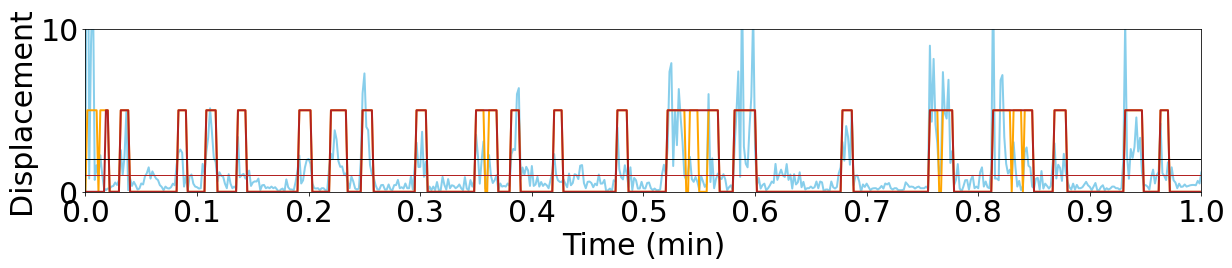

In [244]:
#Readjusting detection for movement transition events separately to increase sensitivity

move_interval = 0.5 #in second
arrest_interval = 0.5 #in second
move_threshold = 2 #pixel
arrest_threshold = 1 #pixel
bin_pos = 5
#marker_dist = [tailBase_dist, tailBase_dist]
#marker_dist = [nose_dist, nose_dist]
marker_dist = [nose_dist, tailBase_dist]
femerge = [0 for i in range(tpath)]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR end

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []

activity_mean_array = []
activity_mean2_array = []    
event_times = []
event2_times = []

#Transition from arrest to movement
print("\033[1m"+"Behavioral event detection: arrest to movement"+"\033[0m")
#User defined parameters
intervals=['pre','drug','ISO','emerge','post']
print("total behave time: ", behave_time[-1])
total_time = behave_time[-1]
interval_cutoff = [0,300]
pre_window_size = 5 # in second
post_window_size = 10 # in second

#Initialize matrices and lists
#behavior marker # defined by marker_dist, manual addition if need more
category_size=len(intervals)
behave_data_marker1 = []
behave_data_marker2 = []
behave_data2_marker1 = []
behave_data2_marker2 = []
activity_data = []
activity_data2 = []
event_count = 0
event_count2 = 0
behave_interval_time = []
activity_interval_time = []
behave_mean=[]
behave_std=[]
print("Done")

movement_bin = []
print("\033[1m"+"Finding behavioral events..."+"\033[0m")
count = 0
bin_up = 0
bin_down = 0
for i in range(int(total_time*frate)+1):
    if(marker_dist[0][i]>move_threshold):
        count=count+1
        bin_up = 1
        movement_bin.append(bin_pos)
    else:
        if(bin_up==1):
            if(marker_dist[0][i]<arrest_threshold and count>=move_interval*10):
                count=0
                bin_up=0
                movement_bin.append(0)
            else:
                count=count+1
                movement_bin.append(bin_pos)
             #endif
        else:
            count=0
            movement_bin.append(0)
        #endif
#endfor i

temp_movement = []
bin_up=0
for i in range(len(movement_bin)):
    if(i>arrest_threshold*10 and i<len(movement_bin)-arrest_threshold*10):
        if(movement_bin[i]>0):
            bin_up=1
            temp_movement.append(bin_pos)
        else:
            if(bin_up==1):
                if(max(movement_bin[i:i+1+int(arrest_interval*10)])>0):
                    temp_movement.append(bin_pos)
                else:
                    bin_up=0
                    temp_movement.append(0)
            else:
                temp_movement.append(0)
        #endif
    else:
        temp_movement.append(0)
    #endif
#endfor i

for i in range(len(temp_movement)):
    if(i<=interval_cutoff[0]*frate or i>=interval_cutoff[1]*frate):
        temp_movement[i] = 0
    #endif
#endfor i


print("Done.") #User defined plot parameters

plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=1
xint=(xmax-xmin)/10
ymin_2=0
ymax_2=10
yint_2=10

behave_time_min = [x/60 for x in behave_time]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
ax2.plot(behave_time_min, movement_bin, color='orange',linewidth=2)
ax2.plot(behave_time_min, temp_movement, color='firebrick',linewidth=2)
ax2.axhline(move_threshold, color='black', linewidth=1)
ax2.axhline(arrest_threshold, color='firebrick', linewidth=1)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()


In [247]:
#Event counter
bin_pos = 0
event_count=0
for i in range(len(temp_movement)):
    if(temp_movement[i]>0):
        if(bin_pos==0):
            event_count=event_count+1
            bin_pos=1
    else:
        bin_pos=0
print("Events: ", event_count)

Events:  62


In [249]:
np.save("20220118_all_movement_bin.npy", temp_movement)

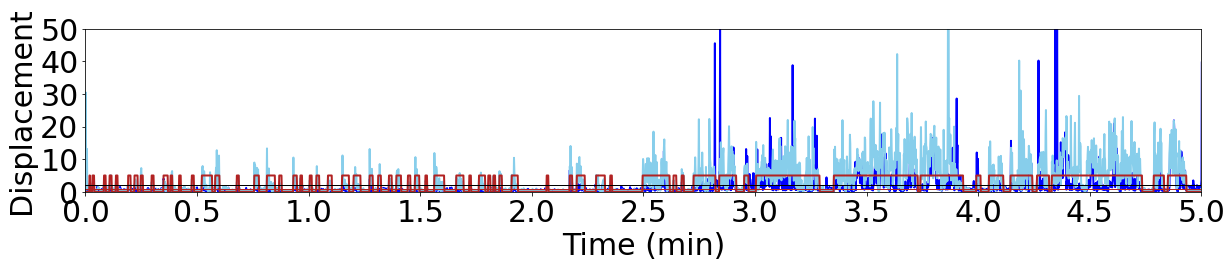

In [251]:
#Visualize all events

plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=5
xint=(xmax-xmin)/10
ymin_2=0
ymax_2=50
yint_2=10

behave_time_min = [x/60 for x in behave_time]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='blue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
ax2.plot(behave_time_min, temp_movement, color='firebrick',linewidth=2)
ax2.axhline(move_threshold, color='black', linewidth=1)
ax2.axhline(arrest_threshold, color='firebrick', linewidth=1)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()